In [102]:
import pandas as pd

In [103]:
data = pd.read_csv('datasets/po_final.csv')

In [105]:
data.head()

,Quantity Ordered,Quantity Received,Percentage Quantity Received,Delivery DaysOn-Time Rating,Quality Rating,Quantity Rating,On-Time Rating,Total Rating
0,26,20,76.923077,9,5,3,2,3
1,27,27,100.000000,9,4,5,2,3
2,36,30,83.333333,10,3,3,2,2
3,19,15,78.947368,9,1,3,2,2
4,13,10,76.923077,8,4,3,3,3


In [106]:
X = data[['Quality Rating', 'Quantity Rating', 'On-Time Rating']]

In [107]:
X.columns

Index(['Quality Rating', 'Quantity Rating', 'On-Time Rating'], dtype='object')

In [108]:
data.columns

Index(['Quantity Ordered', 'Quantity Received', 'Percentage Quantity Received',
       'Delivery DaysOn-Time Rating', 'Quality Rating', 'Quantity Rating',
       'On-Time Rating', 'Total Rating'],
      dtype='object')

In [109]:
y = data['Total Rating']

In [110]:
X.head()

,Quality Rating,Quantity Rating,On-Time Rating
0,5,3,2
1,4,5,2
2,3,3,2
3,1,3,2
4,4,3,3


In [111]:
y.head()

0    3
1    3
2    2
3    2
4    3
Name: Total Rating, dtype: int64

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [114]:
print(len(X_train))

253


In [115]:
X_train.head()

,Quality Rating,Quantity Rating,On-Time Rating
8,4,3,3
263,5,5,5
204,2,5,4
124,3,5,2
260,3,1,3


In [116]:
y_train.head()

8      3
263    5
204    3
124    3
260    2
Name: Total Rating, dtype: int64

In [117]:
set(y)

{1, 2, 3, 4, 5}

In [118]:
X.isnull().sum() #To check missing values in any row of the selected columns.

Quality Rating     0
Quantity Rating    0
On-Time Rating     0
dtype: int64

In [119]:
from sklearn import svm

In [157]:
svc = svm.SVC(kernel='rbf', C=1,gamma=1).fit(X, y)

In [158]:
svc.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [159]:
y_pred = svc.predict(X_test)

In [160]:
y_pred

array([4, 3, 3, 4, 3, 3, 3, 3, 4, 4, 2, 3, 4, 4, 3, 3, 4, 4, 5, 3, 4, 2,
       2, 4, 4, 3, 3, 3, 2, 4, 3, 4, 2, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3,
       3, 2, 3, 4, 4, 4, 3, 3, 3, 4, 3, 4, 3, 2, 3, 4, 2, 2, 4, 2, 3, 2,
       3, 3, 2, 4, 2, 2, 3, 2, 2, 3, 4, 3, 2, 4, 3, 2, 4, 3, 4])

In [161]:
import numpy as np
np.array(y_test)

array([4, 3, 3, 4, 3, 3, 3, 3, 4, 4, 2, 3, 4, 4, 3, 3, 4, 4, 5, 3, 4, 2,
       2, 4, 4, 3, 3, 3, 2, 4, 4, 4, 2, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3,
       3, 2, 3, 4, 4, 4, 3, 3, 3, 4, 3, 4, 3, 2, 3, 4, 2, 2, 4, 2, 3, 2,
       3, 3, 2, 4, 2, 2, 3, 2, 2, 3, 4, 3, 2, 4, 3, 2, 4, 3, 4])

In [162]:
set(y)

{1, 2, 3, 4, 5}

In [163]:
result = pd.DataFrame({
    'Actual Class': y_test,
    'Predicted Class': y_pred
})

In [164]:
result.head()

,Actual Class,Predicted Class
76,4,4
269,3,3
327,3,3
158,4,4
200,3,3


In [165]:
from sklearn.metrics import confusion_matrix

In [166]:
print(confusion_matrix(y_test, y_pred))

[[18  0  0  0]
 [ 1 38  0  0]
 [ 0  1 26  0]
 [ 0  0  0  1]]


In [167]:
from sklearn.metrics import accuracy_score

In [168]:
accuracy_score(y_test, y_pred) * 100

97.6470588235294

In [169]:
from sklearn.metrics import classification_report

In [170]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.95      1.00      0.97        18
           3       0.97      0.97      0.97        39
           4       1.00      0.96      0.98        27
           5       1.00      1.00      1.00         1

   micro avg       0.98      0.98      0.98        85
   macro avg       0.98      0.98      0.98        85
weighted avg       0.98      0.98      0.98        85



In [171]:
# Prediction:


In [173]:
Quant_Rating = int(input('Enter Quantity Rating:'))

Enter Quantity Rating:4


In [174]:
Qual_Rating = int(input('Enter Quality Rating:'))

Enter Quality Rating:4


In [175]:
OnTimeDelivery_Rating = int(input('Enter On time delivery rating:'))

Enter On time delivery rating:4


In [176]:
new_data = [[Quant_Rating, Qual_Rating, OnTimeDelivery_Rating]]

In [177]:
prediction = svc.predict(new_data)

In [178]:
if(prediction[0] == 5):
    print("Supplier is Class-1")
elif(prediction[0] == 4):
    print("Supplier is class-2")
elif(prediction[0] == 3):
    print("Supplier is class-3")
elif(prediction[0] == 2):
    print("Supplier is class-4")
else:
    print("Supplier is class-5")

Supplier is class-2


In [184]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

/home/panu/.local/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:247: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/home/panu/.local/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:247: UserWarning: No contour levels were found within the data range.
  antialiased=True)


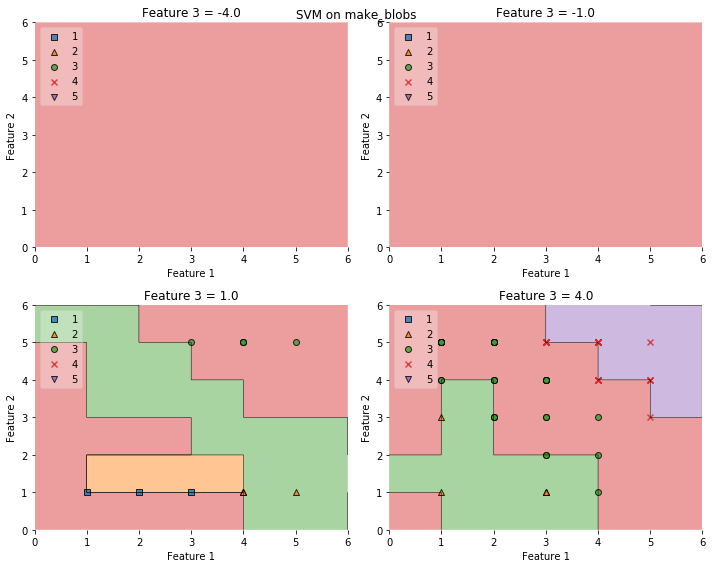

In [192]:
fig, axarr = plt.subplots(2, 2, figsize=(10,8), sharex=True, sharey=True)
values = [-4.0, -1.0, 1.0, 4.0]
width = 0.75
for value, ax in zip(values, axarr.flat):
    plot_decision_regions(X_train.values, y_train.values, clf=svc,
                          filler_feature_values={2: value},
                          filler_feature_ranges={2: width},
                          legend=2, ax=ax)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('Feature 3 = {}'.format(value))

fig.suptitle('SVM on make_blobs')
plt.tight_layout()
plt.show()
